Nama : Sakinah Yunus

NIM  : H071191046

Tugas 02 Machine Learning

DBSCAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
data3 = pd.read_csv('Pengunjung_mall.csv')
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
X = data3[['Usia', 'Pendapatan (juta Rp)']]
y = data3['Rating_pengeluaran (1-100)']

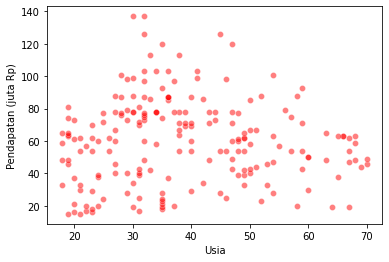

In [13]:
sns.scatterplot(x="Usia", y="Pendapatan (juta Rp)",data=data3,color="red",alpha=0.5)

In [14]:
X = np.array(X)
XX = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.3,min_samples=10)
dbscan.fit(XX)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [15]:
print(dbscan.labels_)
data3["kluster"] = dbscan.labels_
data3.head()

[ 0  0  0  0 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  2  1 -1  2 -1  1 -1  2  1 -1 -1  2
  1 -1  1  2  2  1 -1 -1  1  2 -1 -1 -1 -1 -1  2  3  2  2  2 -1  1  1  1
  3  3  3  3 -1  3  3  3 -1  3  1  3  3  3 -1  3 -1  3 -1  3 -1  3  3  3
  3  3 -1  3  3  3 -1  3 -1  3 -1  3  3  3  3  3 -1  3 -1  3 -1 -1 -1  3
 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),kluster
0,1,Laki,19,15,39,0
1,2,Laki,21,15,81,0
2,3,Perempuan,20,16,6,0
3,4,Perempuan,23,16,77,0
4,5,Perempuan,31,17,40,-1


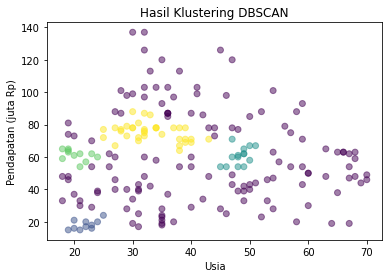

In [19]:
fig, ax = plt.subplots()
sct = ax.scatter(X[:,0],X[:,1], c = data3.kluster, marker = "o", alpha = 0.5)

plt.title("Hasil Klustering DBSCAN")
plt.xlabel("Usia")
plt.ylabel("Pendapatan (juta Rp)")
plt.show()

In [22]:
usia = input("Usia (thn): ")
usia = int(usia)
pendapatan = input("Pendapatan (juta Rp): ")
pendapatan = int(pendapatan)
data = [usia,pendapatan]
hasil = dbscan.fit_predict([data])
print("Prediksi Kluster: ", hasil)


Usia (thn): 60
Pendapatan (juta Rp): 80
Prediksi Kluster:  [-1]


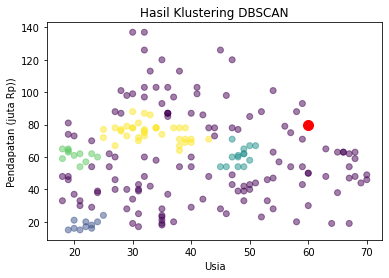

In [23]:
fig, ax = plt.subplots()
sct = ax.scatter(X[:,0],X[:,1], c = data3.kluster, marker = "o", alpha = 0.5)

plt.title("Hasil Klustering DBSCAN")
plt.xlabel("Usia")
plt.ylabel("Pendapatan (juta Rp))")
plt.scatter(usia,pendapatan, c = "red", s=100)
plt.show()